https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/

In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('data.csv')
df1=df.reset_index()['evi']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [5]:
print(train_size)
print(test_size)

164
19


In [6]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 7
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(ytest.shape)


(156, 7)
(156,)
(11, 7)
(11,)


In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [10]:
print(X_train.shape)
print(X_test.shape)

(156, 7, 1)
(11, 7, 1)


In [11]:
# 8. Define LSTM Model

model = Sequential()
model.add(LSTM(800, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [12]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=2000,batch_size=256,verbose=1)

Epoch 1/2000
1/1 [==============================] - 6s 6s/step - loss: 0.4959 - val_loss: 0.2266
Epoch 2/2000
1/1 [==============================] - 1s 918ms/step - loss: 0.1841 - val_loss: 0.0356
Epoch 3/2000
1/1 [==============================] - 1s 714ms/step - loss: 0.0297 - val_loss: 0.0711
Epoch 4/2000
1/1 [==============================] - 1s 944ms/step - loss: 0.1238 - val_loss: 0.0425
Epoch 5/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0801 - val_loss: 0.0184
Epoch 6/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0283 - val_loss: 0.0450
Epoch 7/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0375 - val_loss: 0.0778
Epoch 8/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0623 - val_loss: 0.0914
Epoch 9/2000
1/1 [==============================] - 1s 884ms/step - loss: 0.0738 - val_loss: 0.0851
Epoch 10/2000
1/1 [==============================] - 1s 841ms/step - loss: 0.0688 - val_loss: 0.0663
Epoch 11/2000


In [13]:
# 10. Dự báo dữ liệu test,
train_predict=model.predict(X_train)
y_pred=model.predict(test_data.reshape(test_data.shape[0],test_data.shape[1] , 1))


1/1 [==============================] - 0s 452ms/step


In [14]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [15]:
ytest=scaler.inverse_transform(test_data)
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(ytest - y_pred)/np.abs(ytest))*100

print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing RMSE: 0.01695780870145911
Testing MAPE: 3.6662540664970558
Testing MAE: 0.0165713166419509


In [16]:
x_input=test_data[0:].reshape(1,-1)
x_input.shape

(1, 19)

In [17]:
# 13. Dự báo 10 ngày tiếp theo
x_input=test_data[0:].reshape(1,-1)
print(x_input.shape)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=19
i=0
while(i<10):

    if(len(temp_input)>19):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


(1, 19)
[1.5561584]
20
1 day input [0.71540054 0.73053315 0.4774483  0.46431196 0.72188454 0.68857751
 0.74682071 0.62243718 0.66714599 0.57858875 0.58928701 0.81002374
 0.81500835 0.89610319 0.94386025 0.88118952 0.59230357 0.41830451
 1.55615842]
1 day output [[2.2521076]]
2 day input [0.73053315 0.4774483  0.46431196 0.72188454 0.68857751 0.74682071
 0.62243718 0.66714599 0.57858875 0.58928701 0.81002374 0.81500835
 0.89610319 0.94386025 0.88118952 0.59230357 0.41830451 1.55615842
 2.25210762]
2 day output [[2.3372233]]
3 day input [0.4774483  0.46431196 0.72188454 0.68857751 0.74682071 0.62243718
 0.66714599 0.57858875 0.58928701 0.81002374 0.81500835 0.89610319
 0.94386025 0.88118952 0.59230357 0.41830451 1.55615842 2.25210762
 2.33722329]
3 day output [[2.4788125]]
4 day input [0.46431196 0.72188454 0.68857751 0.74682071 0.62243718 0.66714599
 0.57858875 0.58928701 0.81002374 0.81500835 0.89610319 0.94386025
 0.88118952 0.59230357 0.41830451 1.55615842 2.25210762 2.33722329
 2.47

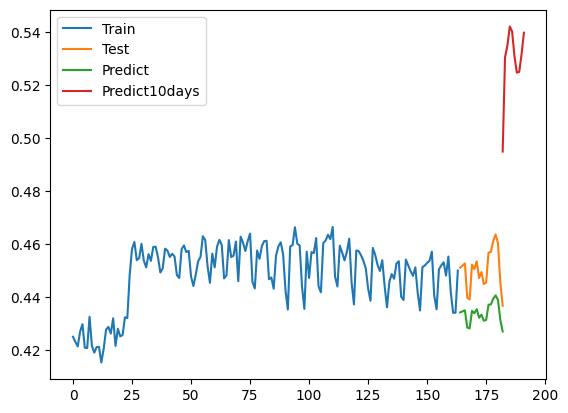

In [18]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+9, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict10days'])
plt.show()

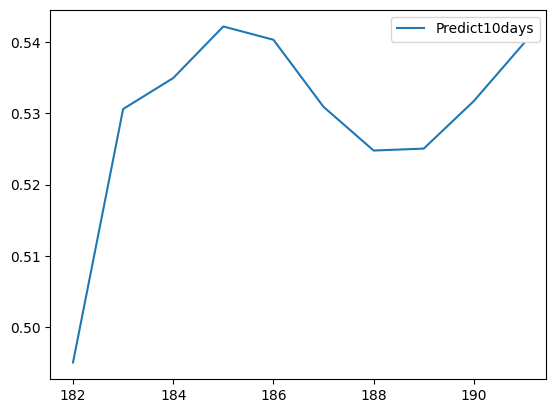

In [19]:
# 14.Vẽ hình
# Dự đoán 10 ngày tiếp theo
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+9, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Predict10days'])
plt.show()

In [20]:
print(scaler.inverse_transform(lst_output))

[[0.49499375]
 [0.53061758]
 [0.53497443]
 [0.54222201]
 [0.54035708]
 [0.53092988]
 [0.52478412]
 [0.5250559 ]
 [0.53173648]
 [0.53987135]]
